In [1]:
%matplotlib

import numpy.random as random
import matplotlib.pyplot as plt
import copy
import numpy as np

a=[1,2,3,4,5]
b=copy.deepcopy(a)
a.append(5)

print ("a = %s" % a)
print ("b = %s" % b)

θₜ = {}
θₐ = {}
θₜ["μ"] = random.normal(1, 1)
print(θₜ)

c,d =3,7

print ("c = %s" % c)
print ("d = %s" % d)


nb_i=40

test = [np.array([i, 40+i]) for i in range(nb_i)]

print(test)

test2=[]

test2.append(np.array([test]))

Using matplotlib backend: MacOSX
a = [1, 2, 3, 4, 5, 5]
b = [1, 2, 3, 4, 5]
{'μ': 0.9085279830113109}
c = 3
d = 7
[array([ 0, 40]), array([ 1, 41]), array([ 2, 42]), array([ 3, 43]), array([ 4, 44]), array([ 5, 45]), array([ 6, 46]), array([ 7, 47]), array([ 8, 48]), array([ 9, 49]), array([10, 50]), array([11, 51]), array([12, 52]), array([13, 53]), array([14, 54]), array([15, 55]), array([16, 56]), array([17, 57]), array([18, 58]), array([19, 59]), array([20, 60]), array([21, 61]), array([22, 62]), array([23, 63]), array([24, 64]), array([25, 65]), array([26, 66]), array([27, 67]), array([28, 68]), array([29, 69]), array([30, 70]), array([31, 71]), array([32, 72]), array([33, 73]), array([34, 74]), array([35, 75]), array([36, 76]), array([37, 77]), array([38, 78]), array([39, 79])]


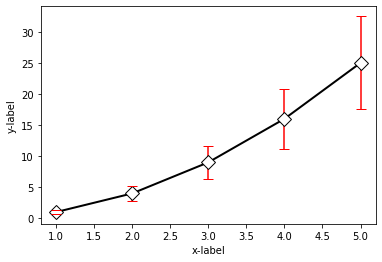

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


x=np.array([1.0,2.0,3.0,4.0,5.0])
y=x**2
E=y*0.3


fig, ax=plt.subplots()
ax.plot(
    x,y,
    linewidth=2,
    color="black"
)
ax.plot(
    x,y,
    marker="D",
    markersize=10,
    markerfacecolor="white",
    markeredgecolor="black",
    linestyle="None"
)
ax.errorbar(
    x,y,
    yerr=E,
    fmt="none",
    color="red",
    capsize = 5
)
plt.ylabel("y-label")
plt.xlabel("x-label")



plt.show()

In [3]:
%matplotlib inline

import math
import pystan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
# ダミーデータセットを作成


x_axis = []
y_axis = []

A = 6.67
B = 0.35
sigma = 2

for i in range(100):
    for k in range(3):
        x_axis.append(i/10)
        y_axis.append(np.random.normal(A*i/10+B, sigma))

    
data = np.zeros((300, 2), dtype=float)
data[:,0] = x_axis
data[:,1] = y_axis
data = pd.DataFrame(data, columns=['x-axis', 'y-axis'])

data.to_csv('Training.csv', header=True, index=False)


In [5]:
data = pd.read_csv('Training.csv',dtype = 'float') # データセットを読み込む
data

     x-axis     y-axis
0       0.0   0.398190
1       0.0   0.064216
2       0.0   0.445692
3       0.1   0.954055
4       0.1   1.625609
..      ...        ...
295     9.8  65.770349
296     9.8  64.858323
297     9.9  66.897833
298     9.9  65.834469
299     9.9  67.133607

[300 rows x 2 columns]


In [6]:
model = """
data {
    int<lower=0> N; //列数
    real x[N]; //横軸
    real y[N]; //縦軸
}

parameters {
    real a;
    real b;
    real<lower=0> sigma;
}

transformed parameters {
    real mu[N];
    for (i in 1:N) {
        mu[i] = a*x[i]+b;
    }
}

model {
    for (i in 1:N) {
        y[i] ~ normal(mu[i], sigma);
    }
}

generated quantities {
    real y_rep[N];
    for (n in 1:N){
        y_rep[n] = normal_rng(mu[n], sigma);
    }
}
"""
Stan_Model = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_37e90546c322f6ac8e0160105e1faae0 NOW.


In [7]:
fit_nuts = Stan_Model.sampling(
    data=dict(y=data["y-axis"], x=data["x-axis"], N=len(data["x-axis"])), 
    iter=1000, chains=4,thin=1,warmup=500, 
    seed=194838, control=dict(adapt_delta=0.99,max_treedepth=20)
    ) 

print(fit_nuts)

Inference for Stan model: anon_model_37e90546c322f6ac8e0160105e1faae0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a            6.67  4.1e-4   0.01   6.64   6.66   6.67   6.67   6.69    769    1.0
b            0.42  2.3e-3   0.06    0.3   0.38   0.43   0.47   0.55    776    1.0
sigma        0.56  7.7e-4   0.02   0.51   0.54   0.56   0.57   0.61    915   1.01
mu[1]        0.42  2.3e-3   0.06    0.3   0.38   0.43   0.47   0.55    776    1.0
mu[2]        0.42  2.3e-3   0.06    0.3   0.38   0.43   0.47   0.55    776    1.0
mu[3]        0.42  2.3e-3   0.06    0.3   0.38   0.43   0.47   0.55    776    1.0
mu[4]        1.09  2.3e-3   0.06   0.96   1.05   1.09   1.13   1.21    779    1.0
mu[5]        1.09  2.3e-3   0.06   0.96   1.05   1.09   1.13   1.21    779    1.0
mu[6]        1.09  2.3e-3   0.06   0.96   1.05   1.09   1.13   1.21    779 

In [8]:
samples = fit_nuts.extract(permuted=False, inc_warmup=True)
paraname = fit_nuts.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_nuts.extract(permuted=False, inc_warmup=True)
iter_from = fit_nuts.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_nuts.sim['fnames_oi']
num_pages = math.ceil(len(paraname)/4)

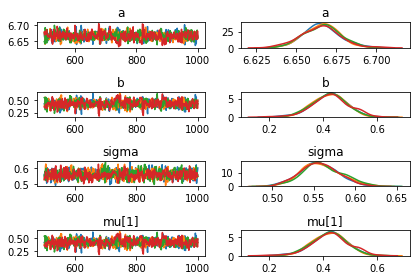

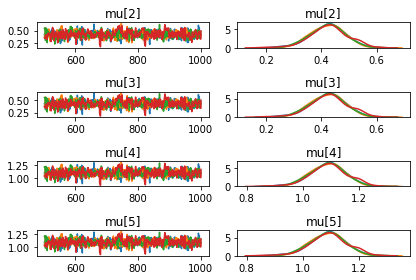

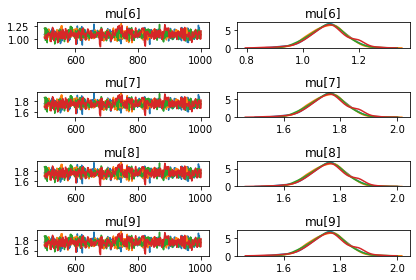

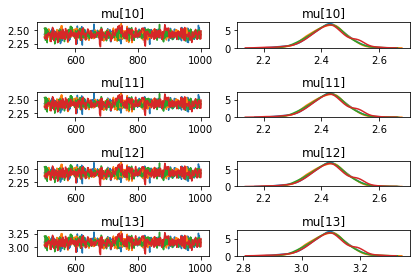

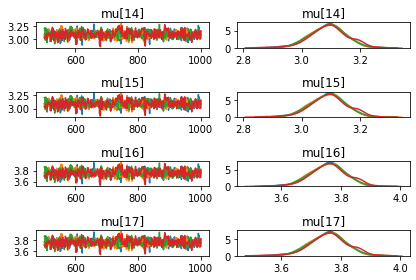

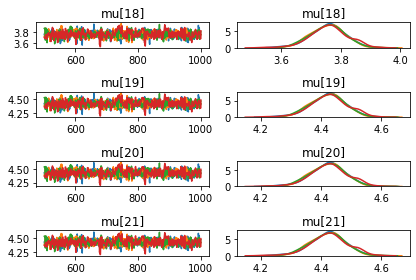

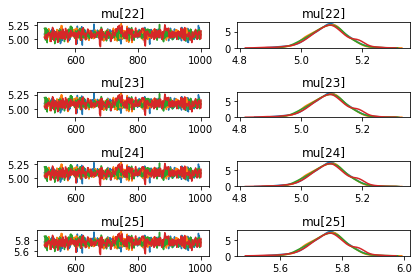

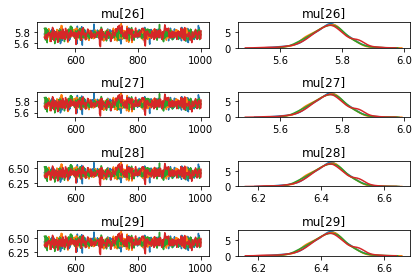

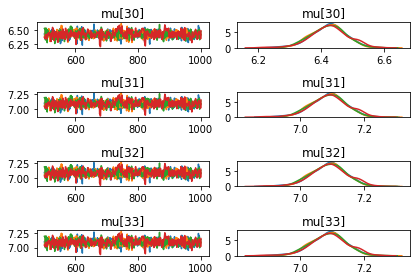

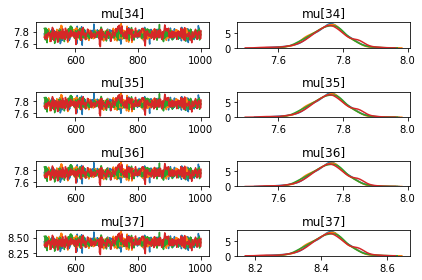

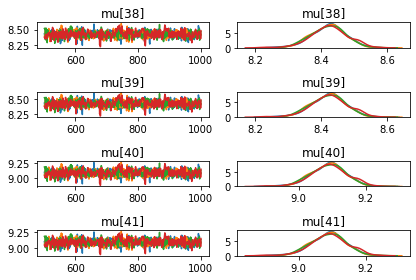

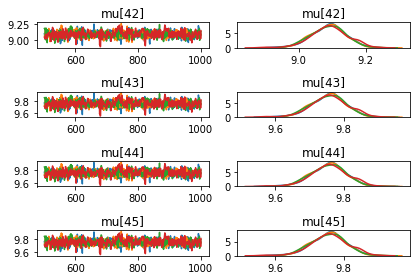

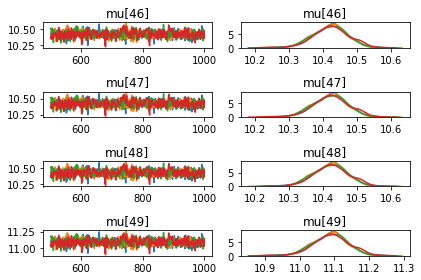

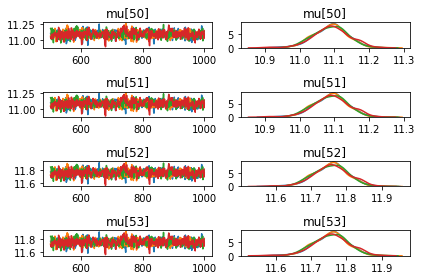

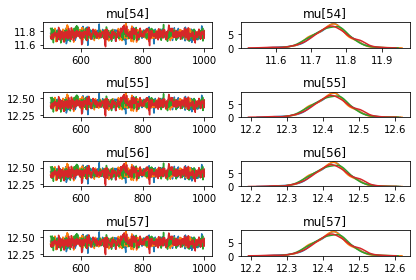

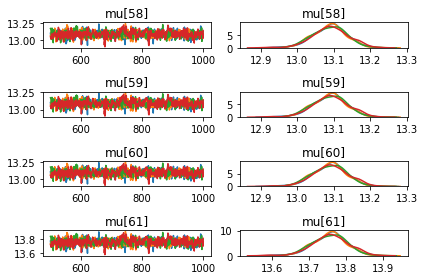

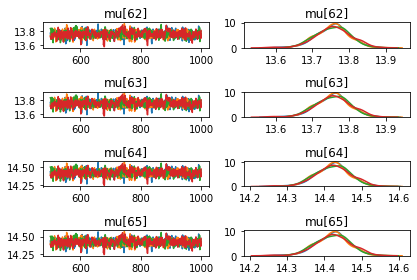

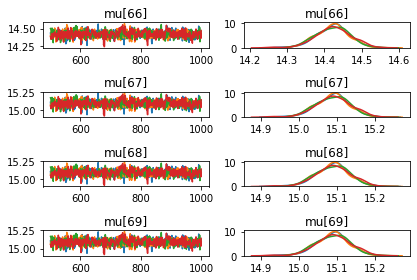

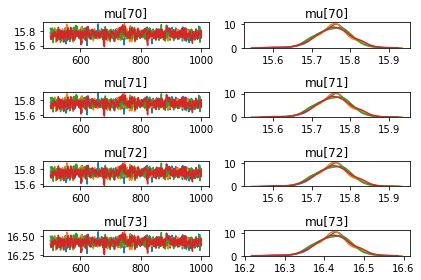

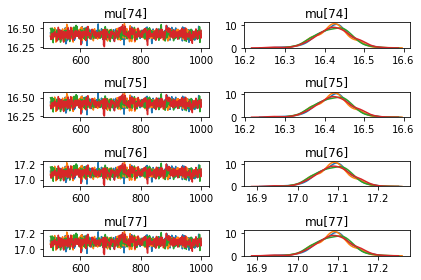

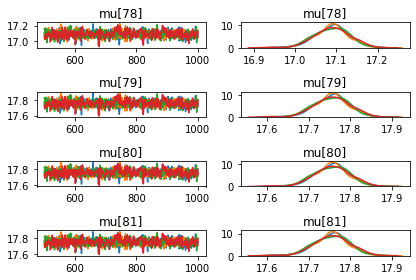

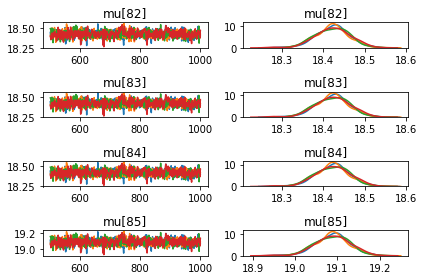

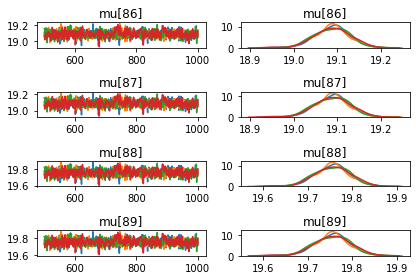

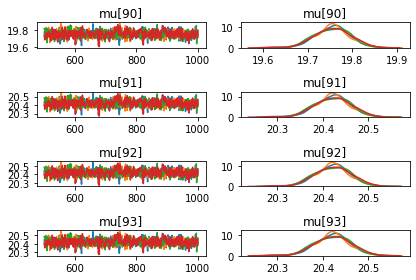

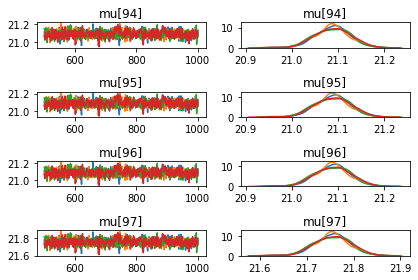

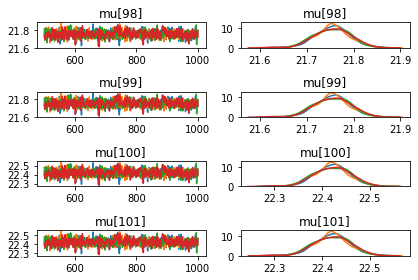

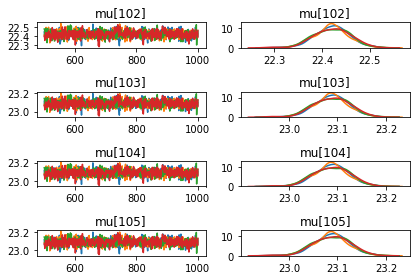

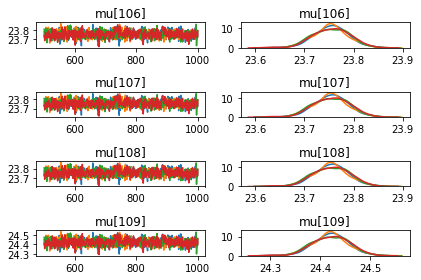

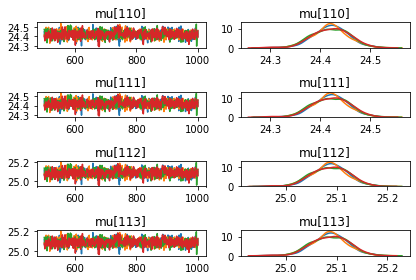

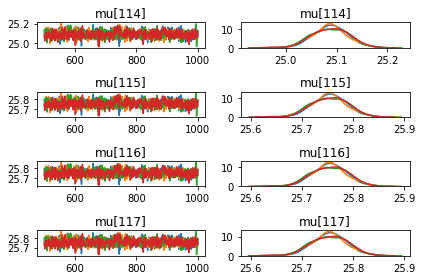

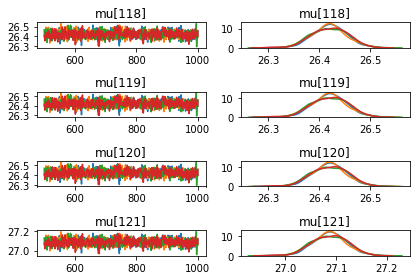

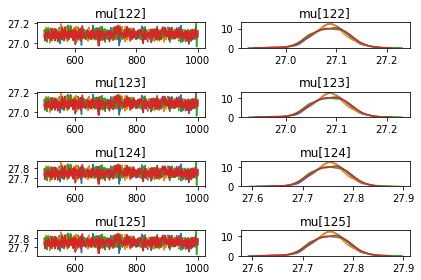

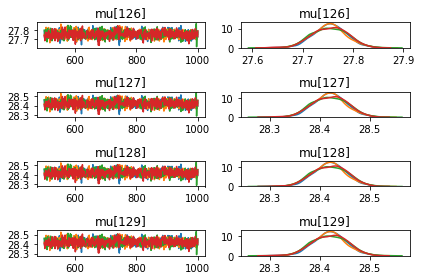

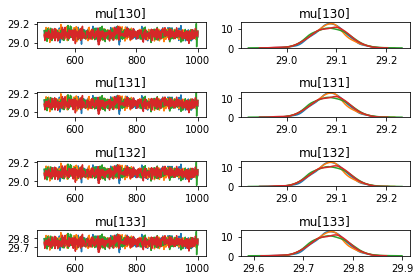

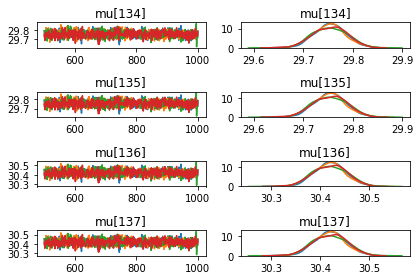

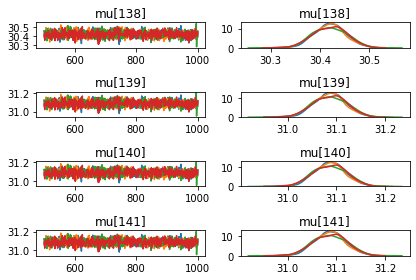

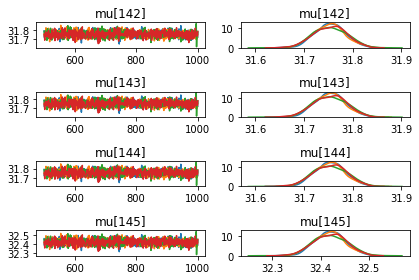

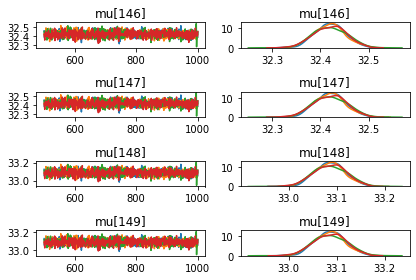

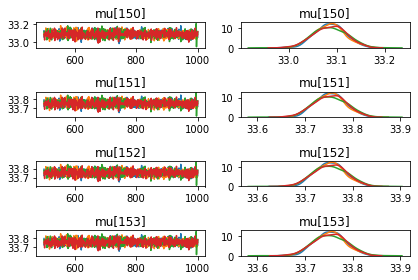

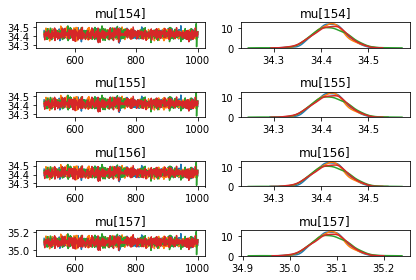

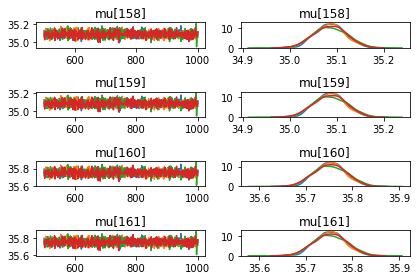

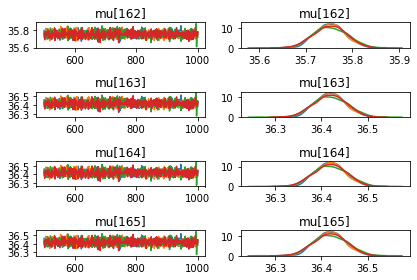

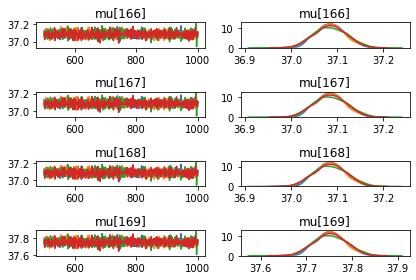

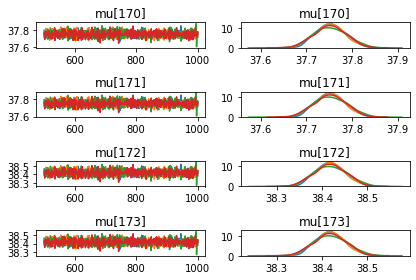

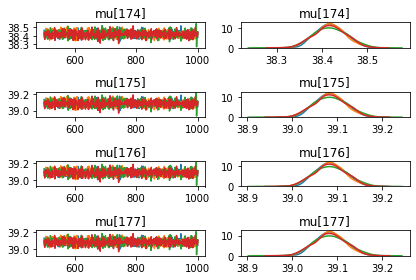

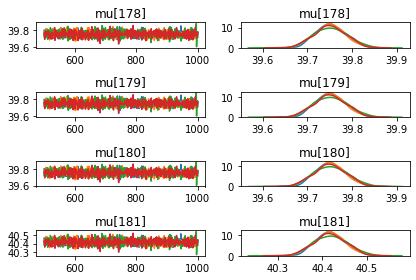

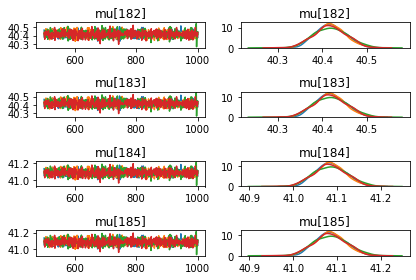

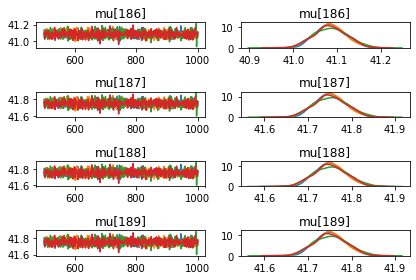

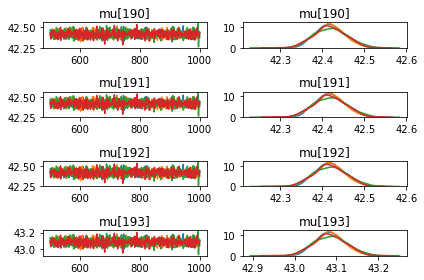

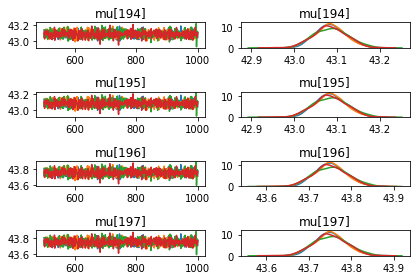

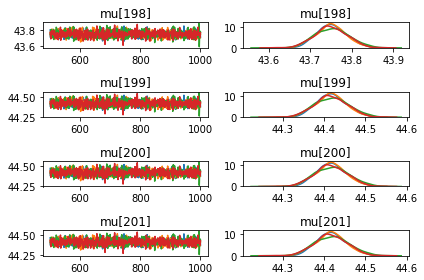

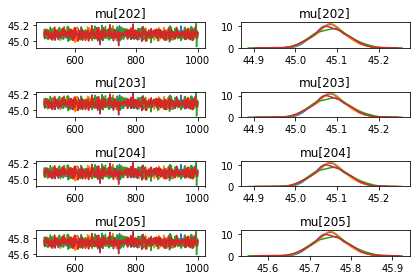

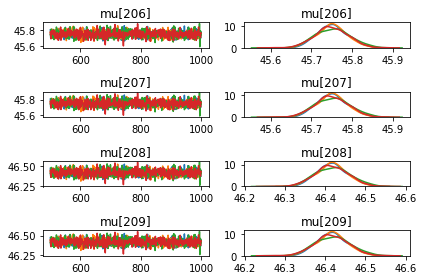

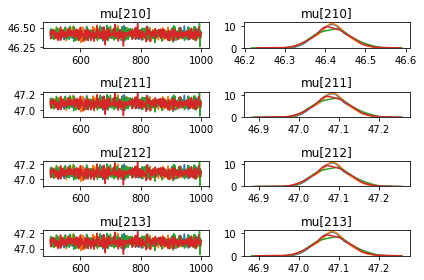

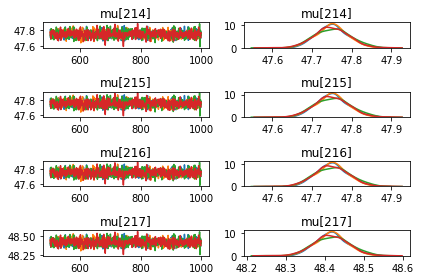

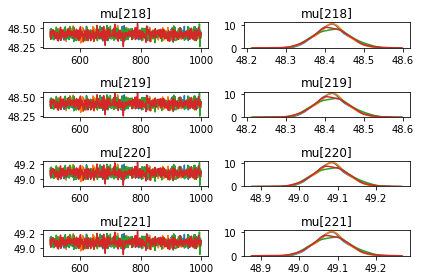

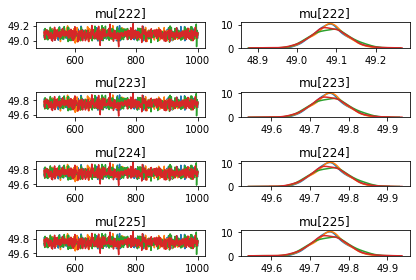

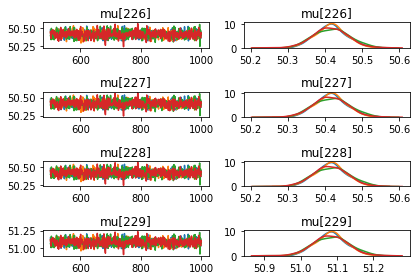

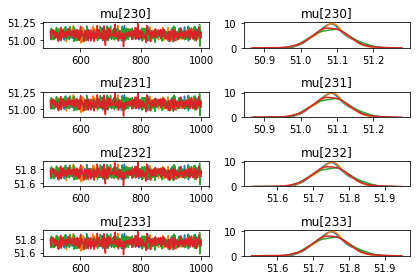

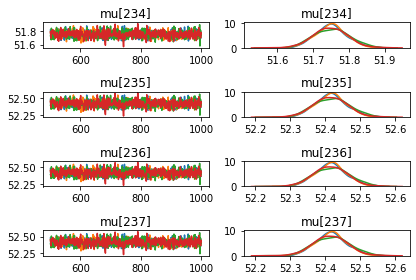

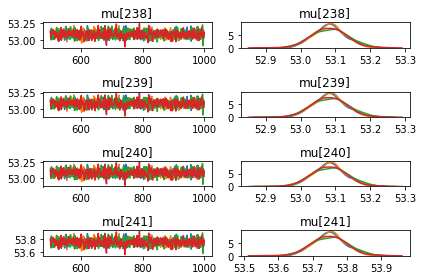

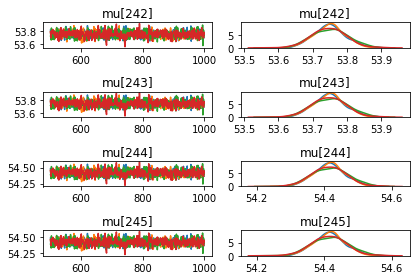

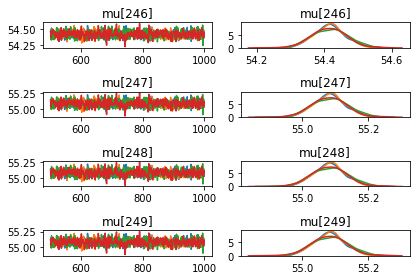

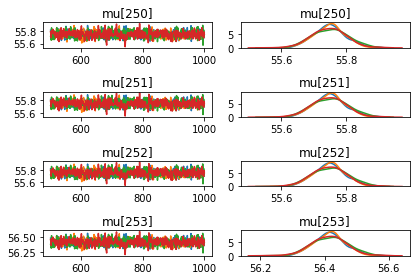

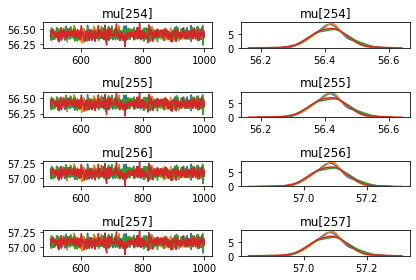

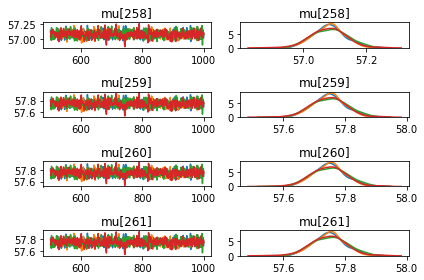

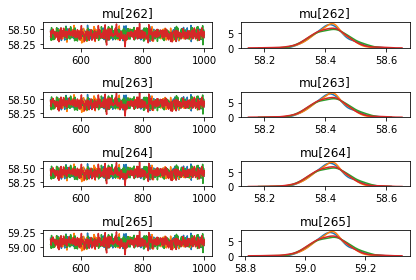

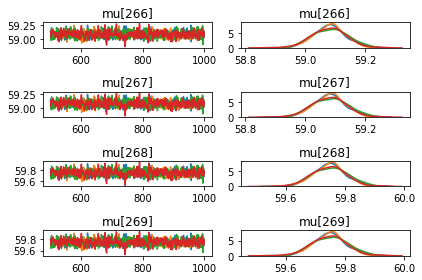

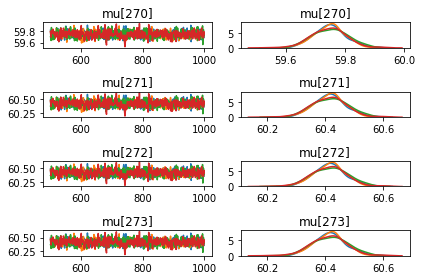

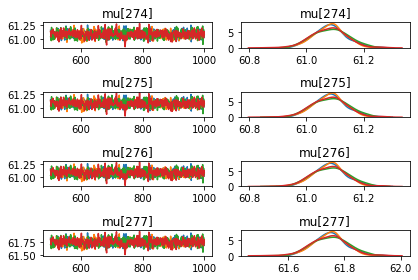

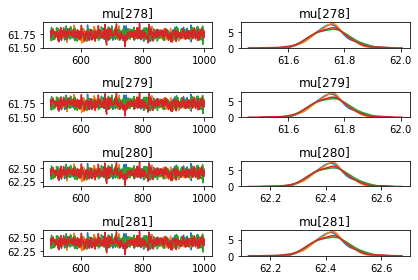

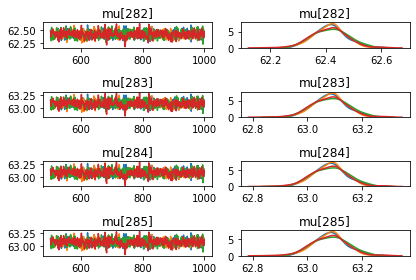

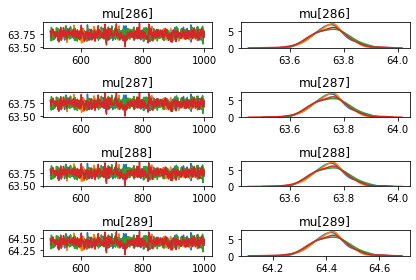

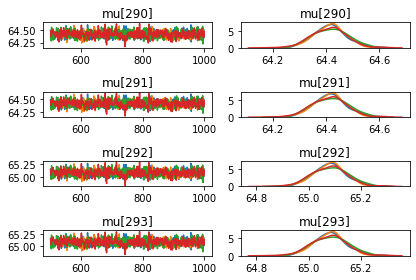

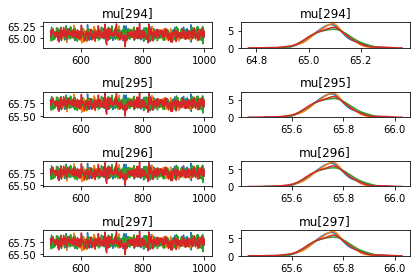

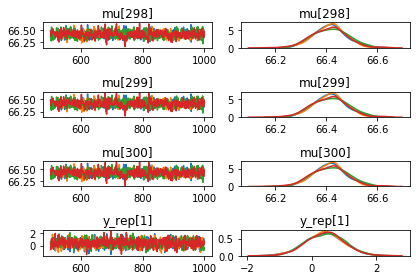

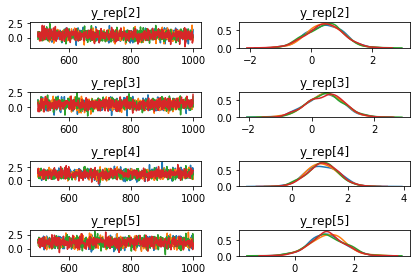

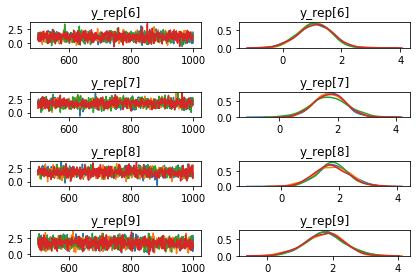

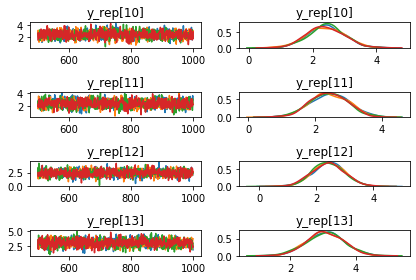

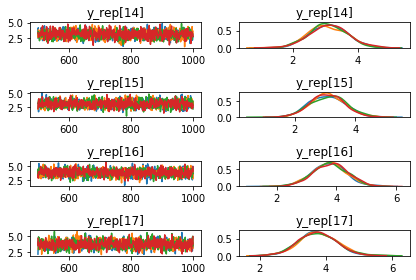

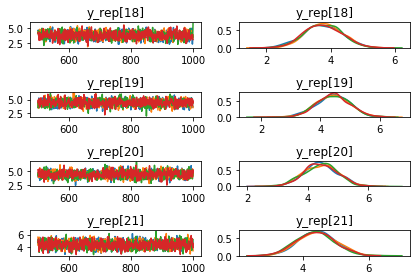

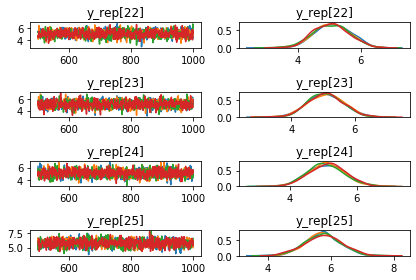

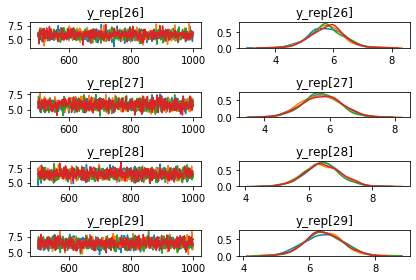

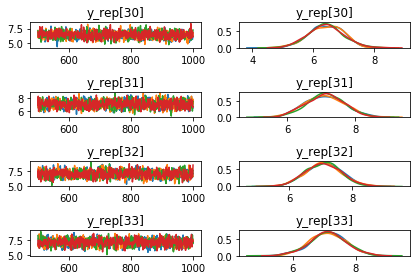

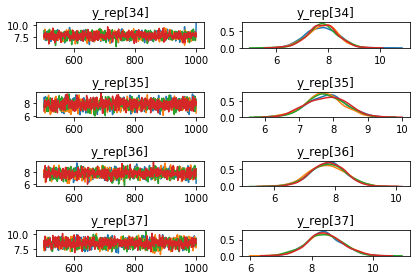

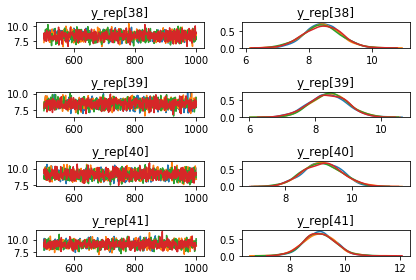

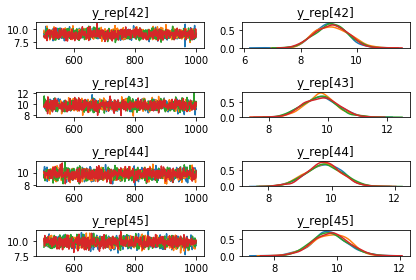

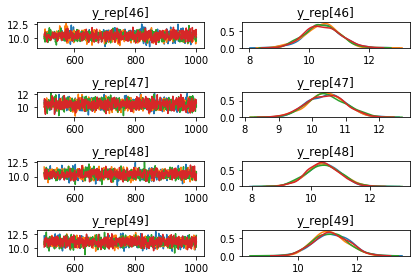

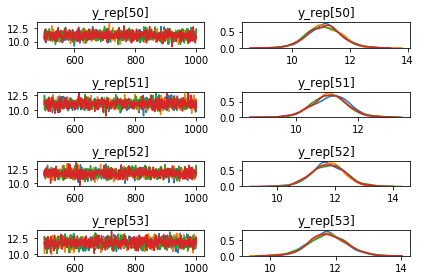

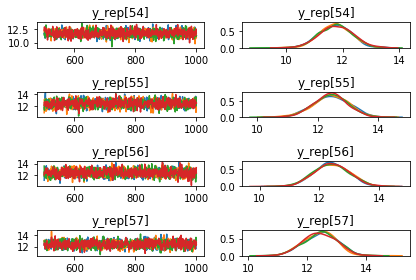

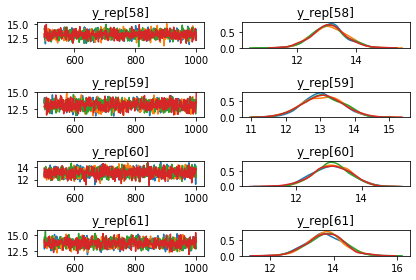

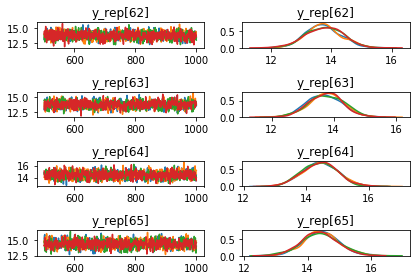

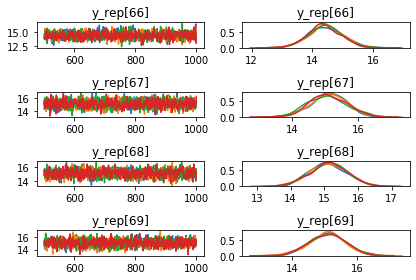

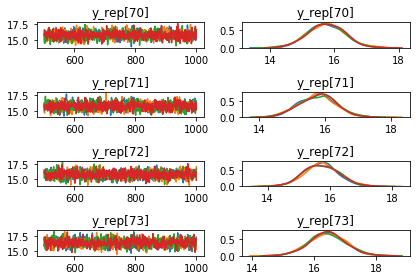

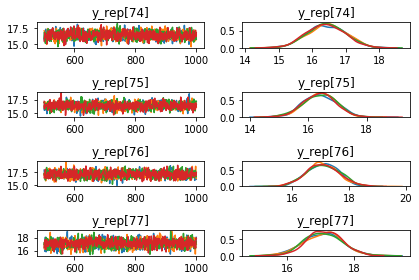

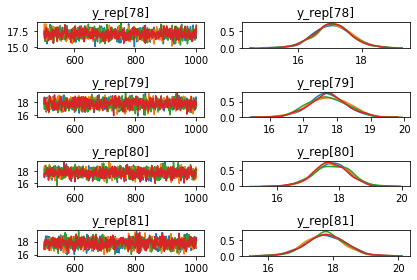

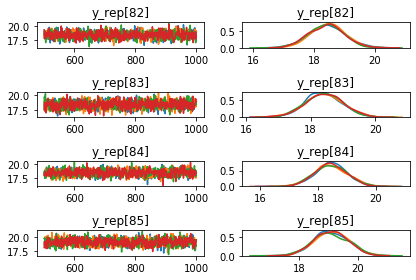

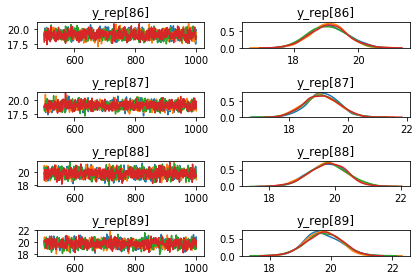

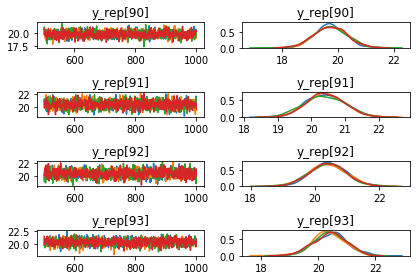

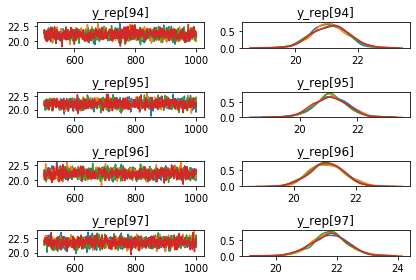

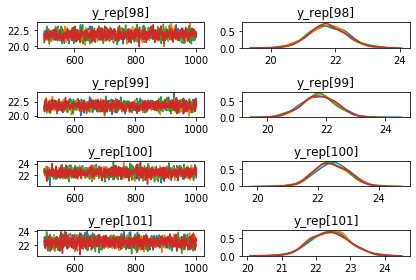

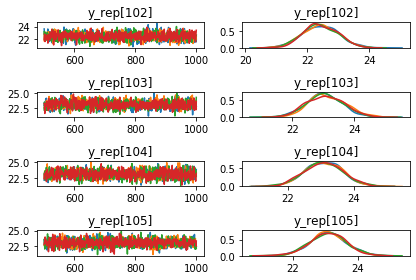

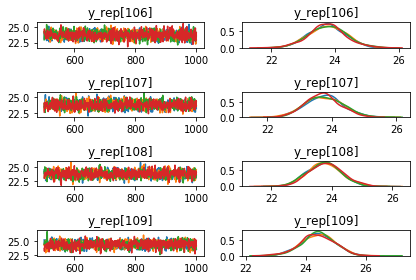

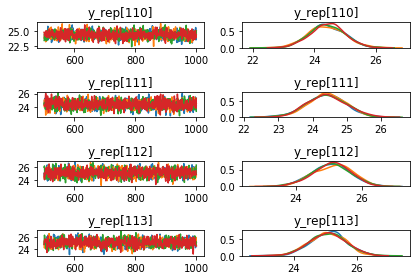

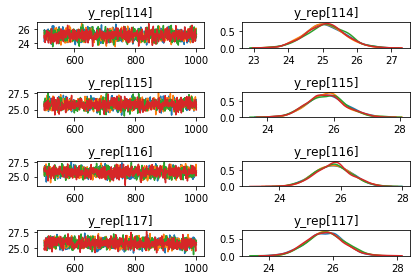

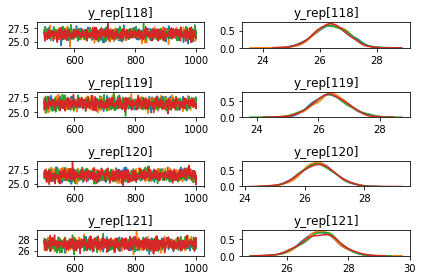

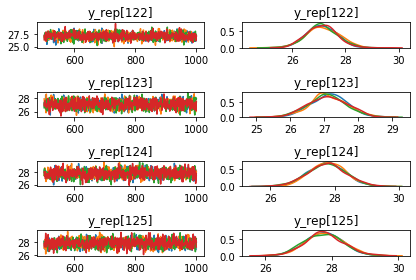

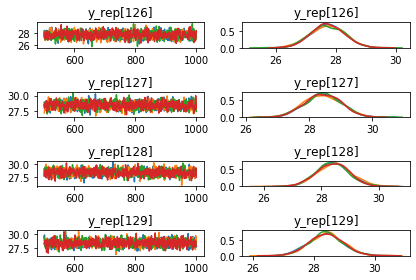

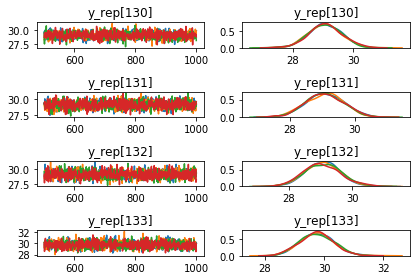

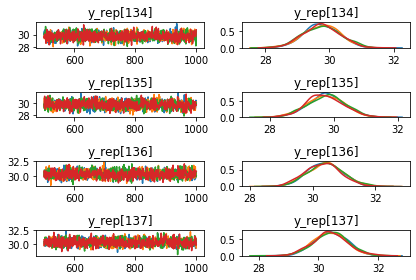

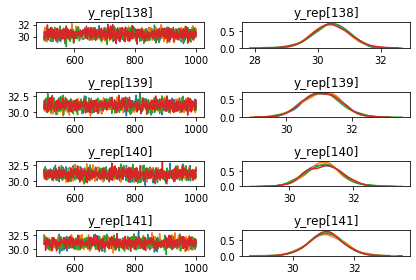

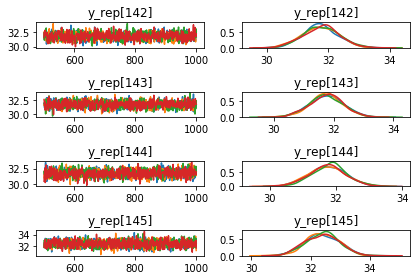

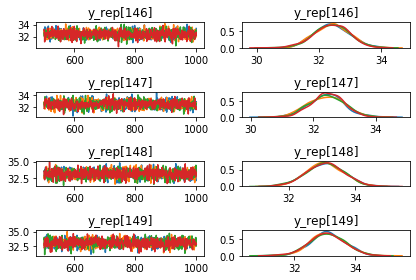

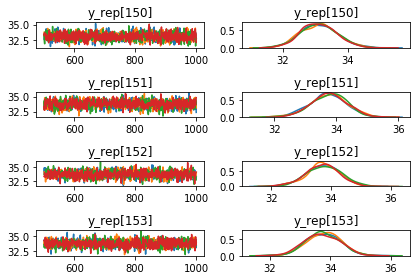

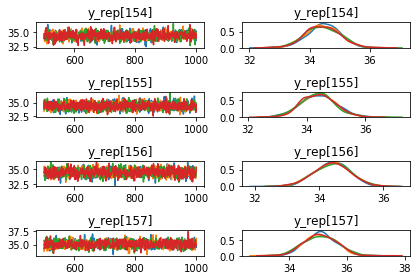

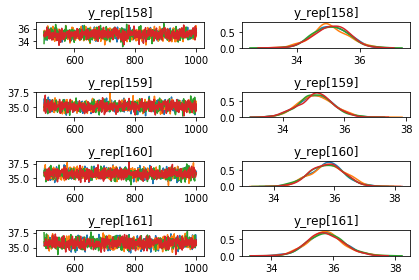

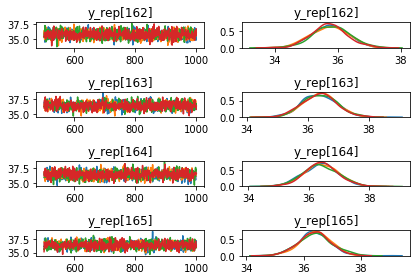

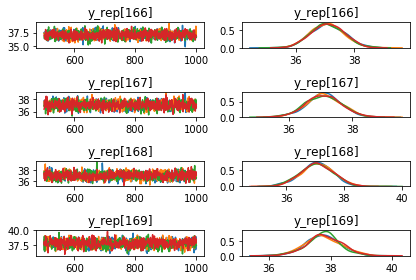

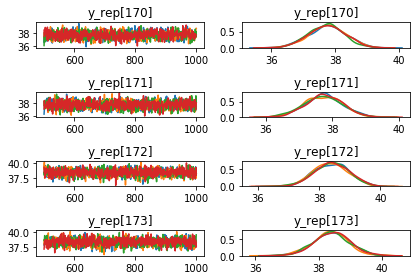

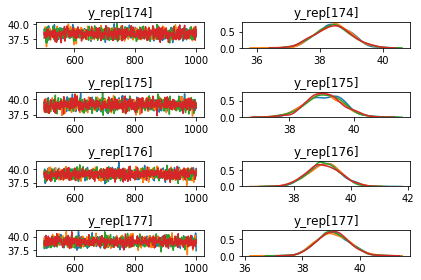

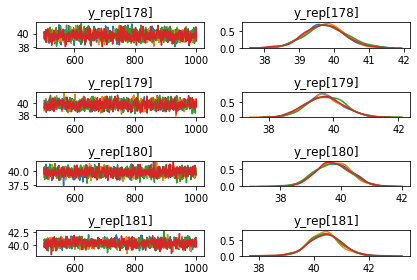

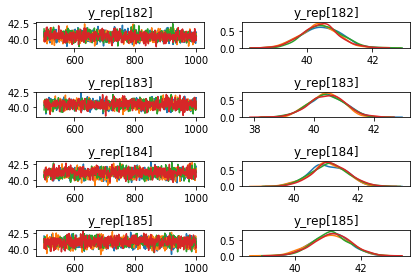

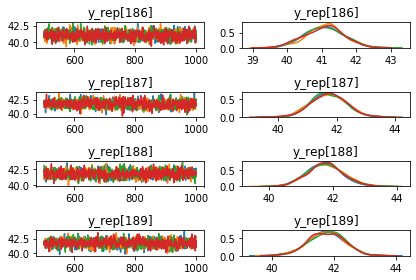

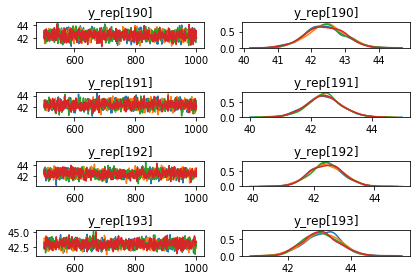

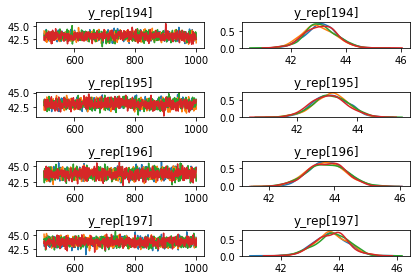

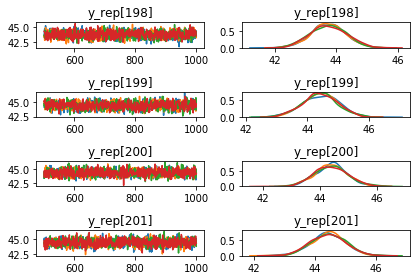

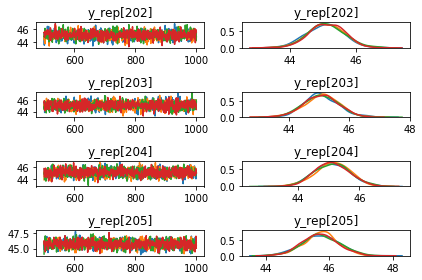

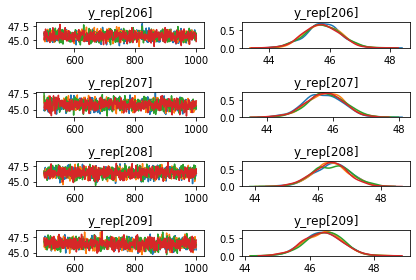

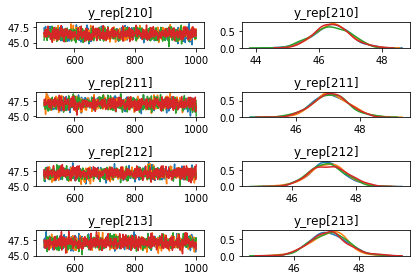

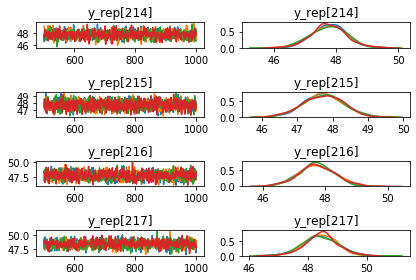

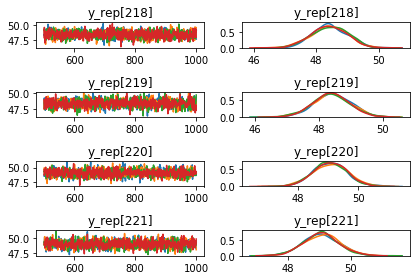

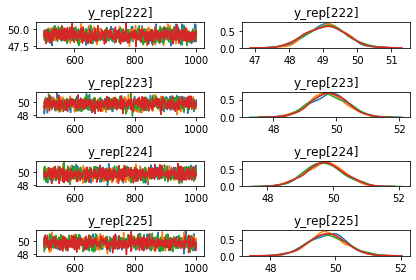

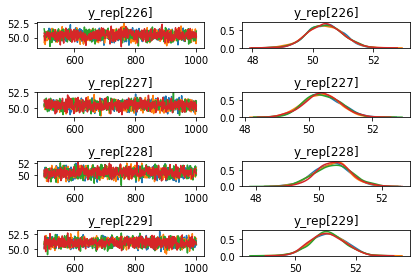

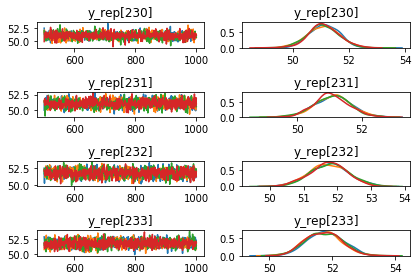

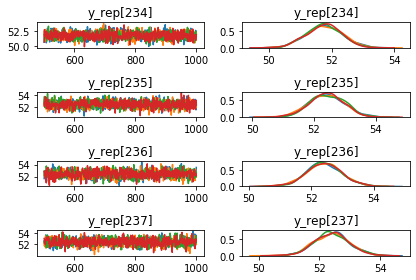

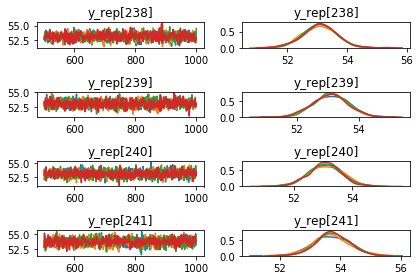

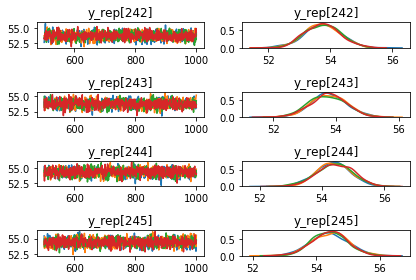

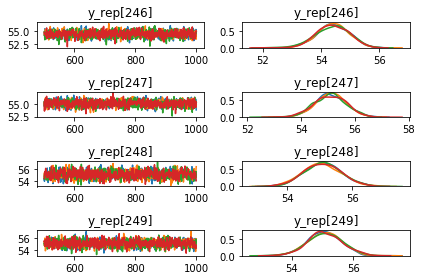

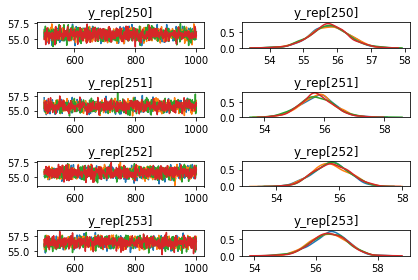

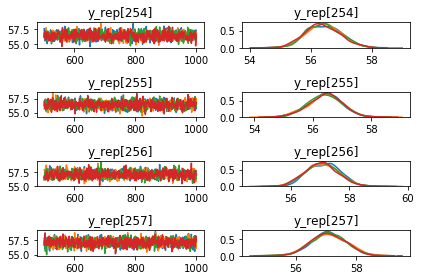

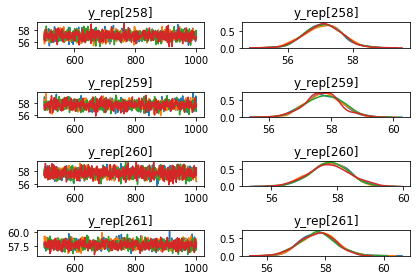

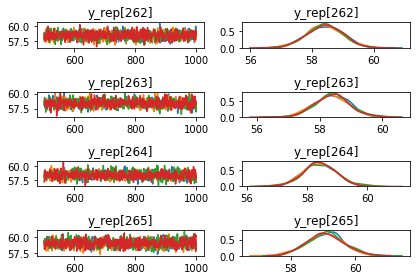

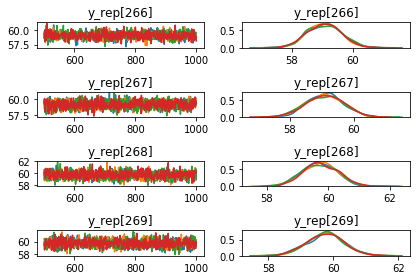

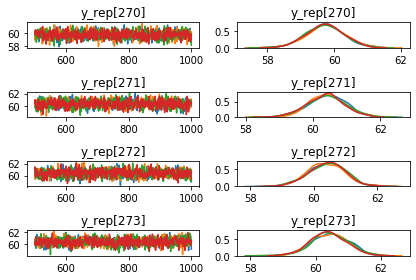

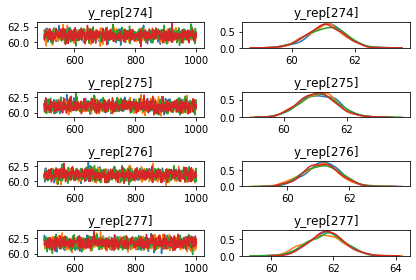

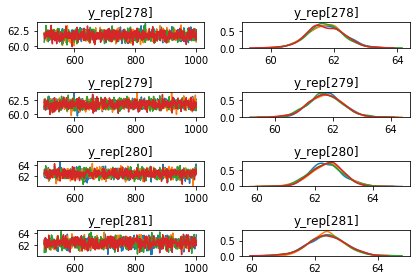

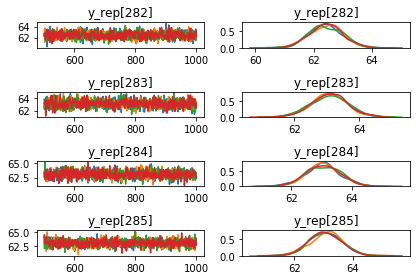

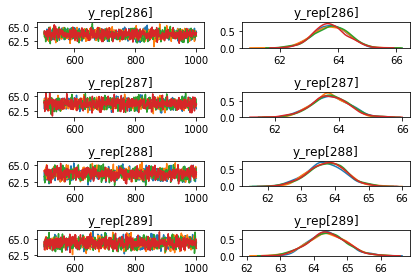

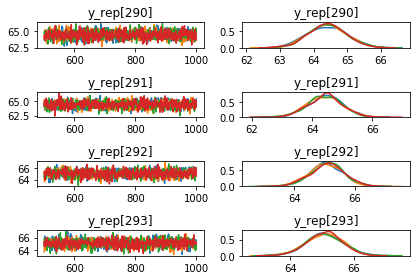

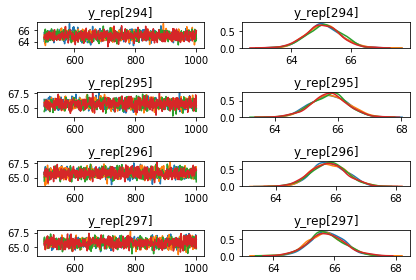

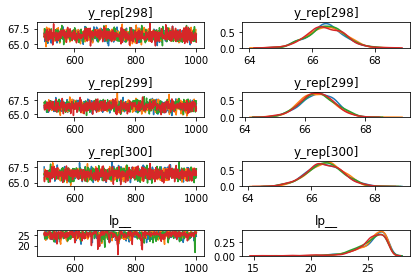

In [9]:
for pg in tqdm(range(num_pages),desc='Progress', leave=False):
    plt.figure()
    pdf = PdfPages("plot/traceplot/Bayesian Fitting Trace"+str(pg)+".pdf")
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    pdf.savefig()
    pdf.close()
    plt.show()

In [10]:
devide = 1000
time_interval = np.arange(0, np.max(data["x-axis"])*(devide+1)/devide, np.max(data["x-axis"])/devide, dtype="float")

In [11]:
samples = fit_nuts.extract(permuted=True)
a = samples["a"]
b = samples["b"]
sigma = samples["sigma"]
y_rep = samples['y_rep']

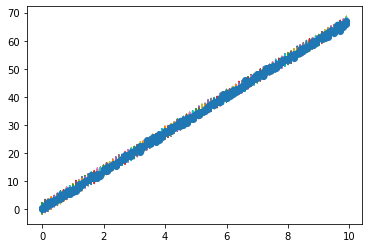

In [18]:
for i in range(len(data["x-axis"])):
    x = data["x-axis"][i]
    X = np.full(len(y_rep[:,i]), x)
    Y = y_rep[:,i]
    plt.plot(X, Y)
plt.plot(data["x-axis"], data["y-axis"], "o")
plt.show()

In [13]:
data["x-axis"][6]

0.2

array([0.29120345, 0.24130802, 0.85372694, ..., 0.93676571, 0.526519  ,
       0.35020322])